In [1]:
import tensorflow as tf
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2024-05-14 23:42:14.079931: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 23:42:14.109674: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 23:42:14.311779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 23:42:14.312570: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 23:42:15.146150: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [14]:
with open('X.pkl', 'rb') as f:
    loaded_array = pickle.load(f)

X = loaded_array

with open('y.pkl', 'rb') as f:
    loaded_array = pickle.load(f)

y = loaded_array

In [16]:
X[0].shape

TensorShape([124, 1024])

In [17]:
print("len(X):", len(X))
print("len(y):", len(y))

len(X): 710
len(y): 710


In [18]:
num_classes = 5
y = tf.keras.utils.to_categorical(y, num_classes)

In [19]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("len(X_train):", len(X_train))
print("len(X_test):", len(X_test))
print("len(y_train):", len(y_train))
print("len(y_test):", len(y_test))

len(X_train): 568
len(X_test): 142
len(y_train): 568
len(y_test): 142


In [32]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [33]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(124,1024), dtype=tf.float32, name='input_embedding'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
], name='yamnet_model')


# Compile the model
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=METRICS)


model.summary()

Model: "yamnet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 126976)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               65012224  
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 65014789 (248.01 MB)
Trainable params: 65014789 (248.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS = 10
early_stopping = EarlyStopping(monitor='val_loss', patience=EPOCHS//3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_test, y_test), batch_size=32,callbacks=[early_stopping])

Epoch 1/10
18/18 [==============================] - 12s 613ms/step - loss: 12.2067 - accuracy: 0.4085 - precision: 0.4102 - recall: 0.3979 - val_loss: 4.2753 - val_accuracy: 0.2817 - val_precision: 0.2754 - val_recall: 0.2676
Epoch 2/10
18/18 [==============================] - 10s 561ms/step - loss: 1.2087 - accuracy: 0.6901 - precision: 0.7219 - recall: 0.6673 - val_loss: 1.6165 - val_accuracy: 0.5493 - val_precision: 0.6545 - val_recall: 0.5070
Epoch 3/10
18/18 [==============================] - 10s 563ms/step - loss: 0.2696 - accuracy: 0.9102 - precision: 0.9473 - recall: 0.8856 - val_loss: 1.4760 - val_accuracy: 0.6972 - val_precision: 0.7395 - val_recall: 0.6197
Epoch 4/10
18/18 [==============================] - 10s 560ms/step - loss: 0.1230 - accuracy: 0.9824 - precision: 0.9875 - recall: 0.9754 - val_loss: 1.3831 - val_accuracy: 0.7606 - val_precision: 0.7953 - val_recall: 0.7113
Epoch 5/10
18/18 [==============================] - 10s 558ms/step - loss: 0.0458 - accuracy: 1.000

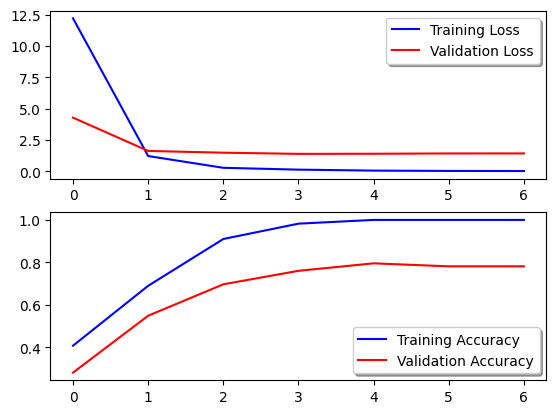

In [36]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [37]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

5/5 [==============================] - 0s 34ms/step - loss: 1.3831 - accuracy: 0.7606 - precision: 0.7953 - recall: 0.7113
Test Accuracy : 76.06%


5/5 [==============================] - 0s 38ms/step


<Axes: >

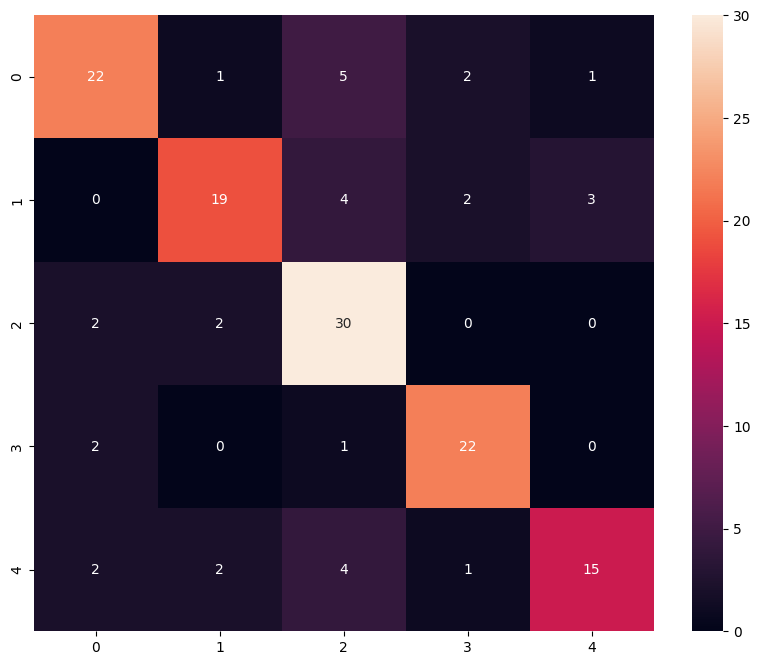

In [38]:
# Predict the values from the testing dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        31
           1       0.79      0.68      0.73        28
           2       0.68      0.88      0.77        34
           3       0.81      0.88      0.85        25
           4       0.79      0.62      0.70        24

    accuracy                           0.76       142
   macro avg       0.77      0.76      0.76       142
weighted avg       0.77      0.76      0.76       142



In [40]:
model.save('yamnet_model.h5')

/home/hassan/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
model = tf.keras.models.load_model('yamnet_model.h5')